<a href="https://colab.research.google.com/github/flatplanet/Pytorch-Tutorial-Youtube/blob/main/simple_NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
#import torch
import torch
import torch.nn as nn
import torch.nn.functional as F


In [7]:
#previous provideed file code from neural network
# Create a Model Class that inherits nn.Module
class Model(nn.Module):
  # Input layer (4 features of the flower) -->
  # Hidden Layer1 (number of neurons) -->
  # H2 (n) -->
  # output (3 classes of iris flowers)
  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
    super().__init__() # instantiate our nn.Module
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x


In [8]:
# Pick a manual seed for randomization
torch.manual_seed(41)
# Create an instance of model
model = Model()

In [9]:
#graphical imports for visual representation
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
#loading the data using url
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
my_df = pd.read_csv(url)


In [11]:
#shows the loaded data, notice that under the "variety" column we have the data loaded in as the word "virginica", we gonna convert that data into values so the machine can understand and read the data
my_df.tail()

,sepal.length,sepal.width,petal.length,petal.width,variety
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica
149,5.9,3.0,5.1,1.8,Virginica


In [12]:
# Change last column variety from strings to integers, giving the value 0 for setosa, versicolor as 1 and virginica as 2 to differentiate the different data
my_df['variety'] = my_df['variety'].replace('Setosa', 0.0)
my_df['variety'] = my_df['variety'].replace('Versicolor', 1.0)
my_df['variety'] = my_df['variety'].replace('Virginica', 2.0)
my_df

C:\Users\danvs\AppData\Local\Temp\ipykernel_14800\830020570.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['variety'] = my_df['variety'].replace('Virginica', 2.0)


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [13]:
# drop the last column variety because the first 4 columns are the features and variety is the outcome so we drop variety to clean things up for x=training data and y for test
X = my_df.drop('variety', axis=1)
y = my_df['variety']

In [14]:
# Convert to numpy arrays
X = X.values
y = y.values

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
# Train and Test Spliting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [17]:
# Convert X features to floattesnsor because the data we were given are float values
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [18]:
#Convert Y features to floattesnsor because the data we were given are float values
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [19]:
# Set the criterion of model to measure the error, how far off the predictions are from the data
criterion = nn.CrossEntropyLoss()
# Choose Adam Optimizer, lr = learning rate (if error doesn't go down after a bunch of iterations (epochs), lower our learning rate)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [20]:
# Train our model!
# Epochs is runs through entire training data once, in this case, we set it to 100 times.
epochs = 100
losses = []
for i in range(epochs):
  # Go forward and get a prediction
  y_pred = model.forward(X_train) # Get predicted results

  # Measure the loss/error, gonna be high at first
  loss = criterion(y_pred, y_train) # predicted values vs the y_train

  # Keep Track of our losses
  losses.append(loss.detach().numpy())

  # print every 10 epoch
  if i % 10 == 0:
    print(f'Epoch: {i} and loss: {loss}')

  # Do some back propagation: take the error rate of forward propagation and feed it back
  # thru the network to fine tune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


Epoch: 0 and loss: 1.125203251838684
Epoch: 10 and loss: 1.0097211599349976
Epoch: 20 and loss: 0.8162347078323364
Epoch: 30 and loss: 0.585993230342865
Epoch: 40 and loss: 0.4003389775753021
Epoch: 50 and loss: 0.26794716715812683
Epoch: 60 and loss: 0.1796349734067917
Epoch: 70 and loss: 0.12165624648332596
Epoch: 80 and loss: 0.0860651433467865
Epoch: 90 and loss: 0.06522615253925323


Text(0.5, 0, 'Epoch')

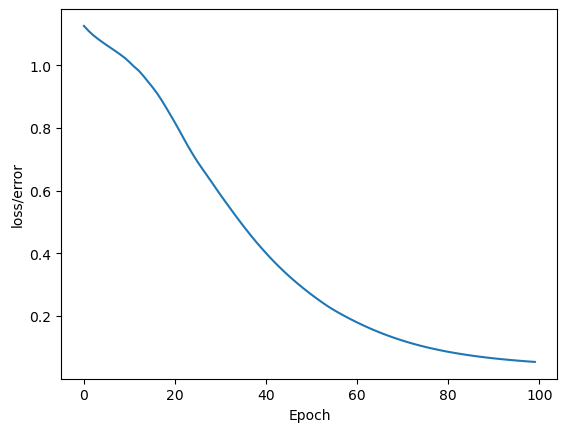

In [21]:
# Graph
plt.plot(range(epochs), losses)
plt.ylabel("loss/error")
plt.xlabel('Epoch')

In [22]:
# Evaluate Test Data Set on Network video
# Evaluate Model on Test Data Set (validate model on test set)
with torch.no_grad():  # Basically turn off back propogation
  y_eval = model.forward(X_test) # X_test are features from our test set, y_eval will be predictions
  loss = criterion(y_eval, y_test) # Find the loss or error


In [23]:
loss

tensor(0.1315)

In [24]:
#count and print out the y value for prediction of the flower
#the columns shows setosam,versicolor, and virginicia
# in this case, the highest number shows us what our model think the flower is and the highest value is the third one which is Virginicia
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    if y_test[i] == 0:
      x = "Setosa"
    elif y_test[i] == 1:
      x = 'Versicolor'
    else:
      x = 'Virginica'


    # Will tell us what type of flower class our network thinks it is
    print(f'{i+1}.)  {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()}')

    # Correct or not
    if y_val.argmax().item() == y_test[i]:
      correct +=1

print(f'We got {correct} correct!')

1.)  tensor([-5.8771,  4.4629,  6.5155]) 	 2 	 2
2.)  tensor([-7.5451,  4.1668,  9.7293]) 	 2 	 2
3.)  tensor([-8.4517,  5.1275, 10.2015]) 	 2 	 2
4.)  tensor([-4.3411,  5.6280,  2.5636]) 	 1 	 1
5.)  tensor([-7.1838,  4.8757,  8.3023]) 	 2 	 2
6.)  tensor([-3.3940,  5.3421,  1.2802]) 	 1 	 1
7.)  tensor([-5.9240,  4.9826,  6.0025]) 	 2 	 2
8.)  tensor([-4.2895,  5.7016,  2.3920]) 	 1 	 1
9.)  tensor([-6.5369,  4.9261,  7.1291]) 	 2 	 2
10.)  tensor([-8.0526,  4.4129, 10.3325]) 	 2 	 2
11.)  tensor([-5.6774,  4.9505,  5.6248]) 	 2 	 2
12.)  tensor([ 4.5748, -2.2579, -2.8925]) 	 0 	 0
13.)  tensor([ 4.2646, -2.0055, -2.7342]) 	 0 	 0
14.)  tensor([-2.1081,  4.0482,  0.5803]) 	 1 	 1
15.)  tensor([ 3.4608, -1.2147, -2.3488]) 	 0 	 0
16.)  tensor([-5.4739,  5.1174,  5.0966]) 	 2 	 1
17.)  tensor([ 4.0637, -1.8045, -2.6504]) 	 0 	 0
18.)  tensor([-5.8090,  4.6057,  6.2494]) 	 1 	 2
19.)  tensor([ 4.9250, -2.5763, -3.0545]) 	 0 	 0
20.)  tensor([ 3.4559, -1.2559, -2.3637]) 	 0 	 0
21.)  ten